In [3]:
# Import the necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
# Load training Dataset
train_df = pd.read_csv('twitter_training.csv')

In [5]:
# Define column names
train_df.columns = ['ID1','Platform1', 'Sentiment1', 'Text1']

In [6]:
print(train_df.head())

    ID1    Platform1 Sentiment1  \
0  2401  Borderlands   Positive   
1  2401  Borderlands   Positive   
2  2401  Borderlands   Positive   
3  2401  Borderlands   Positive   
4  2401  Borderlands   Positive   

                                               Text1  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [7]:
# Load validation Dataset
validation_df = pd.read_csv('twitter_validation.csv')

In [8]:
# Define column names
validation_df.columns = ['ID2','Platform2', 'Sentiment2', 'Text2']

In [9]:
print(validation_df.head())

    ID2  Platform2 Sentiment2  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

                                               Text2  
0  BBC News - Amazon boss Jeff Bezos rejects clai...  
1  @Microsoft Why do I pay for WORD when it funct...  
2  CSGO matchmaking is so full of closet hacking,...  
3  Now the President is slapping Americans in the...  
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...  


In [10]:
# Ensure column names and order are consistent with training data
validation_df.columns = train_df.columns

In [11]:
# Concatenate training and validation data
twitter_df = pd.concat([train_df, validation_df])

In [12]:
print(twitter_df)

      ID1            Platform1  Sentiment1  \
0    2401          Borderlands    Positive   
1    2401          Borderlands    Positive   
2    2401          Borderlands    Positive   
3    2401          Borderlands    Positive   
4    2401          Borderlands    Positive   
..    ...                  ...         ...   
994  4891  GrandTheftAuto(GTA)  Irrelevant   
995  4359                CS-GO  Irrelevant   
996  2652          Borderlands    Positive   
997  8069            Microsoft    Positive   
998  6960      johnson&johnson     Neutral   

                                                 Text1  
0    I am coming to the borders and I will kill you...  
1    im getting on borderlands and i will kill you ...  
2    im coming on borderlands and i will murder you...  
3    im getting on borderlands 2 and i will murder ...  
4    im getting into borderlands and i can murder y...  
..                                                 ...  
994  ⭐️ Toronto is the arts and culture capital 

In [13]:
# Drop unnecessary columns
twitter_df.drop(['ID1'], axis=1, inplace=True)

In [14]:
print(twitter_df.head())

     Platform1 Sentiment1                                              Text1
0  Borderlands   Positive  I am coming to the borders and I will kill you...
1  Borderlands   Positive  im getting on borderlands and i will kill you ...
2  Borderlands   Positive  im coming on borderlands and i will murder you...
3  Borderlands   Positive  im getting on borderlands 2 and i will murder ...
4  Borderlands   Positive  im getting into borderlands and i can murder y...


In [15]:
print(twitter_df.isnull().sum())

Platform1       0
Sentiment1      0
Text1         686
dtype: int64


In [16]:
# Fill missing values in the 'Text1' column with empty strings
twitter_df['Text1'].fillna('', inplace=True)

In [17]:
print(twitter_df.isnull().sum())

Platform1     0
Sentiment1    0
Text1         0
dtype: int64


In [18]:
print("Shape before preprocessing:", twitter_df.shape)

Shape before preprocessing: (75680, 3)


In [19]:
# Data cleaning and preprocessing
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

twitter_df['Cleaned_Text1'] = twitter_df['Text1'].apply(preprocess_text)

In [20]:
# Tokenization and removal of stopwords
stop_words = set(stopwords.words('english'))
def tokenize_text(text):
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

twitter_df['Tokens1'] = twitter_df['Cleaned_Text1'].apply(tokenize_text)

In [21]:
# Check if DataFrame is not empty after preprocessing
print("Shape after preprocessing:", twitter_df.shape)

Shape after preprocessing: (75680, 5)


In [22]:
print(twitter_df)

               Platform1  Sentiment1  \
0            Borderlands    Positive   
1            Borderlands    Positive   
2            Borderlands    Positive   
3            Borderlands    Positive   
4            Borderlands    Positive   
..                   ...         ...   
994  GrandTheftAuto(GTA)  Irrelevant   
995                CS-GO  Irrelevant   
996          Borderlands    Positive   
997            Microsoft    Positive   
998      johnson&johnson     Neutral   

                                                 Text1  \
0    I am coming to the borders and I will kill you...   
1    im getting on borderlands and i will kill you ...   
2    im coming on borderlands and i will murder you...   
3    im getting on borderlands 2 and i will murder ...   
4    im getting into borderlands and i can murder y...   
..                                                 ...   
994  ⭐️ Toronto is the arts and culture capital of ...   
995  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI... 

In [23]:
print(twitter_df.columns)

Index(['Platform1', 'Sentiment1', 'Text1', 'Cleaned_Text1', 'Tokens1'], dtype='object')


In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def get_sentiment_score(tokens):
    text = ' '.join(tokens)
    return sid.polarity_scores(text)['compound']

In [25]:
# Apply sentiment analysis to the 'Tokens1' column
twitter_df['Sentiment_Score1'] = twitter_df['Tokens1'].apply(get_sentiment_score)

# Print the first few rows of the DataFrame with sentiment scores
print(twitter_df[['Cleaned_Text1', 'Sentiment_Score1']].head())

                                       Cleaned_Text1  Sentiment_Score1
0  i am coming to the borders and i will kill you...           -0.6908
1  im getting on borderlands and i will kill you all           -0.6908
2  im coming on borderlands and i will murder you...           -0.6908
3  im getting on borderlands  and i will murder y...           -0.6908
4  im getting into borderlands and i can murder y...           -0.6908


In [26]:
# Summary Statistics
summary_stats = twitter_df['Sentiment_Score1'].describe()
print("Summary Statistics of Sentiment Scores:")
print(summary_stats)

Summary Statistics of Sentiment Scores:
count    75680.000000
mean         0.073937
std          0.526504
min         -0.990600
25%         -0.381800
50%          0.000000
75%          0.557400
max          0.992000
Name: Sentiment_Score1, dtype: float64


C:\Users\Diya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


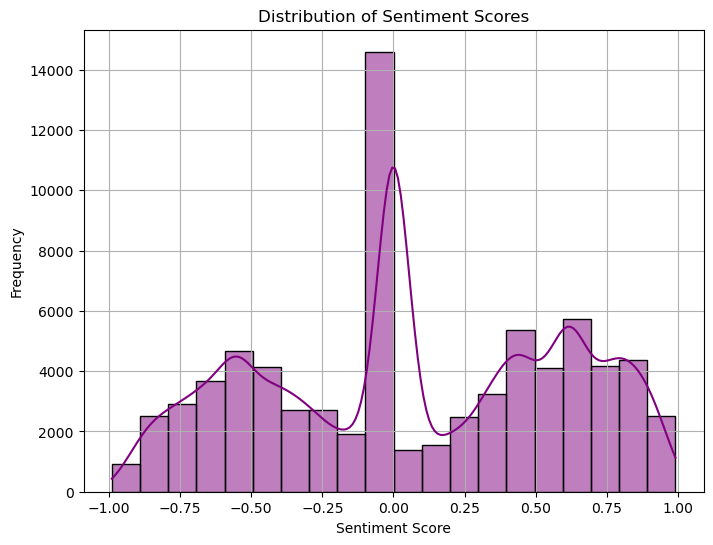

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of sentiment scores using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(twitter_df['Sentiment_Score1'], bins=20, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [28]:
# Calculate average sentiment scores for each platform
platform_sentiment = twitter_df.groupby('Platform1')['Sentiment_Score1'].mean()

In [29]:
# Display average sentiment scores for each platform
print("Average Sentiment Score by Platform:")
print(platform_sentiment)

Average Sentiment Score by Platform:
Platform1
Amazon                               0.270687
ApexLegends                          0.111188
AssassinsCreed                       0.235225
Battlefield                         -0.104383
Borderlands                          0.211619
CS-GO                                0.179585
CallOfDuty                           0.017552
CallOfDutyBlackopsColdWar           -0.000977
Cyberpunk2077                        0.153768
Dota2                                0.096650
FIFA                                 0.007185
Facebook                            -0.060528
Fortnite                             0.039597
Google                               0.086157
GrandTheftAuto(GTA)                  0.040704
Hearthstone                          0.248746
HomeDepot                            0.082612
LeagueOfLegends                      0.133605
MaddenNFL                           -0.016711
Microsoft                            0.109478
NBA2K                            

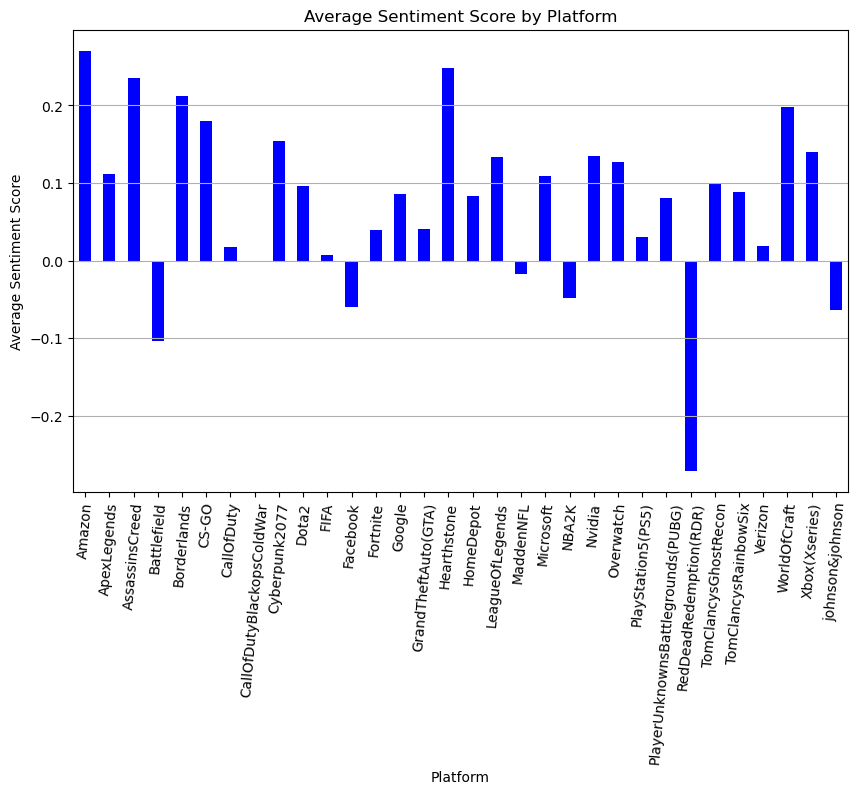

In [30]:
# Visualize platform-wise sentiment using a grouped bar chart
plt.figure(figsize=(10, 6))
platform_sentiment.plot(kind='bar', color='blue')
plt.title('Average Sentiment Score by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=85)
plt.grid(axis='y')
plt.show()

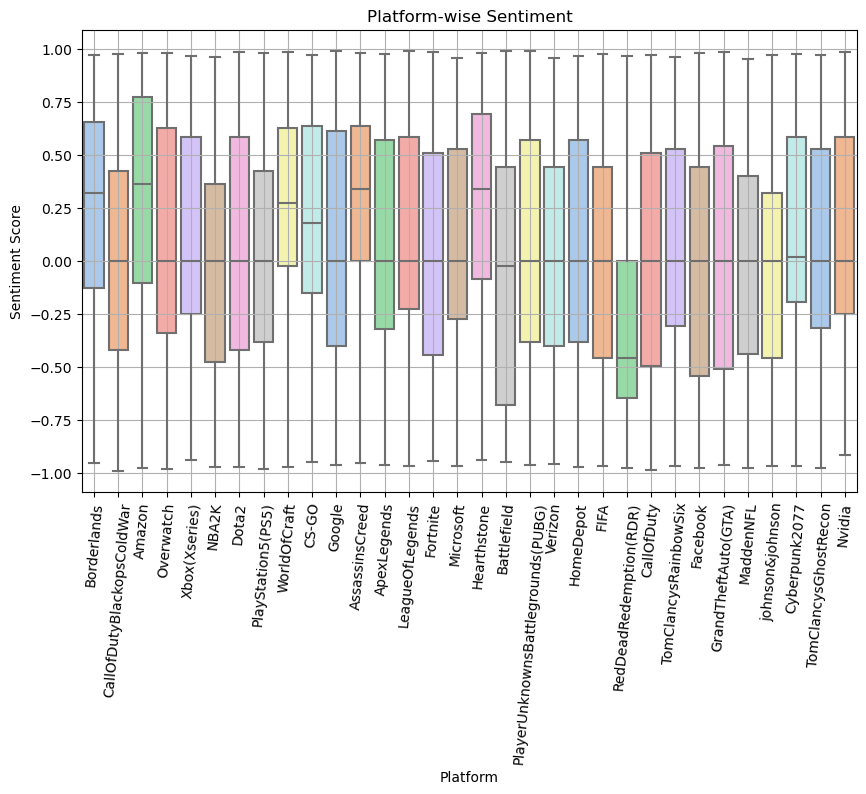

In [31]:
# Alternative visualization: Platform-wise sentiment using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Platform1', y='Sentiment_Score1', data=twitter_df, palette='pastel')
plt.title('Platform-wise Sentiment')
plt.xlabel('Platform')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=85)
plt.grid(True)
plt.show()

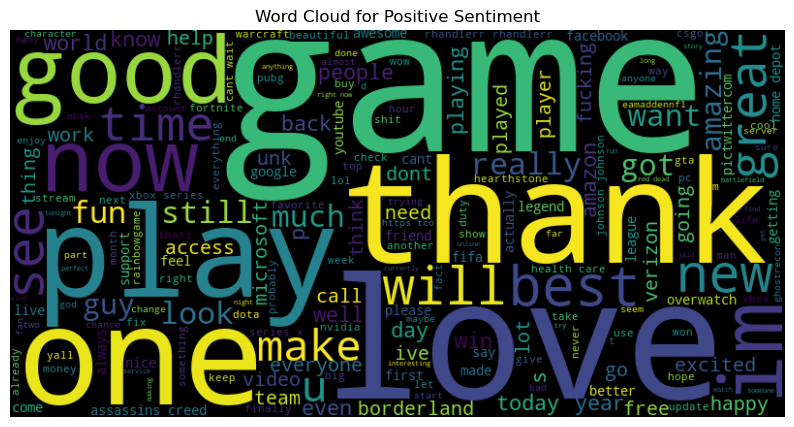

In [32]:
from wordcloud import WordCloud

# Generate word cloud for positive sentiment
positive_text = ' '.join(twitter_df[twitter_df['Sentiment_Score1'] > 0]['Cleaned_Text1'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

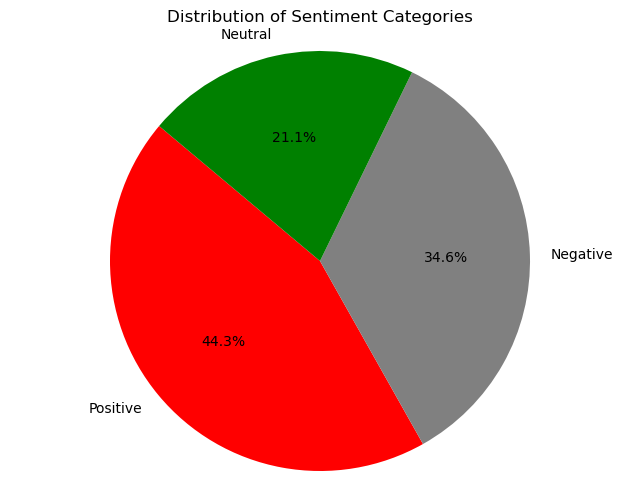

In [33]:
# Categorize sentiment scores into positive, negative, and neutral categories
twitter_df['Sentiment_Category'] = pd.cut(twitter_df['Sentiment_Score1'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

# Count the number of sentiment categories
sentiment_counts = twitter_df['Sentiment_Category'].value_counts()

# Visualize sentiment categories using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['red', 'grey', 'green'], startangle=140)
plt.title('Distribution of Sentiment Categories')
plt.axis('equal')
plt.show()

In [34]:
print(twitter_df.columns)

Index(['Platform1', 'Sentiment1', 'Text1', 'Cleaned_Text1', 'Tokens1',
       'Sentiment_Score1', 'Sentiment_Category'],
      dtype='object')


In [35]:
print(twitter_df.head())

     Platform1 Sentiment1                                              Text1  \
0  Borderlands   Positive  I am coming to the borders and I will kill you...   
1  Borderlands   Positive  im getting on borderlands and i will kill you ...   
2  Borderlands   Positive  im coming on borderlands and i will murder you...   
3  Borderlands   Positive  im getting on borderlands 2 and i will murder ...   
4  Borderlands   Positive  im getting into borderlands and i can murder y...   

                                       Cleaned_Text1  \
0  i am coming to the borders and i will kill you...   
1  im getting on borderlands and i will kill you all   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands  and i will murder y...   
4  im getting into borderlands and i can murder y...   

                              Tokens1  Sentiment_Score1 Sentiment_Category  
0             [coming, borders, kill]           -0.6908           Negative  
1    [im, getting, borderlan

C:\Users\Diya\AppData\Local\Temp\ipykernel_6568\2030715262.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_sentiment_counts = twitter_df.groupby(['Platform1', 'Sentiment_Category']).size().unstack(fill_value=0)


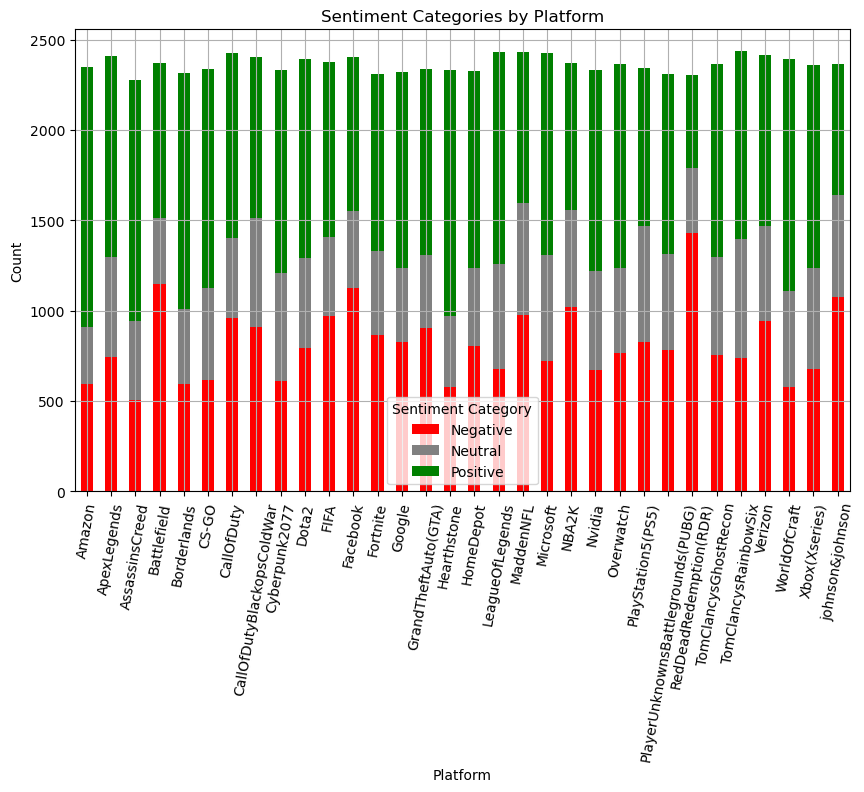

In [36]:
# Stacked bar chart of sentiment categories by platform
platform_sentiment_counts = twitter_df.groupby(['Platform1', 'Sentiment_Category']).size().unstack(fill_value=0)
platform_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'grey', 'green'])
plt.title('Sentiment Categories by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.legend(title='Sentiment Category')
plt.grid(True)
plt.show()

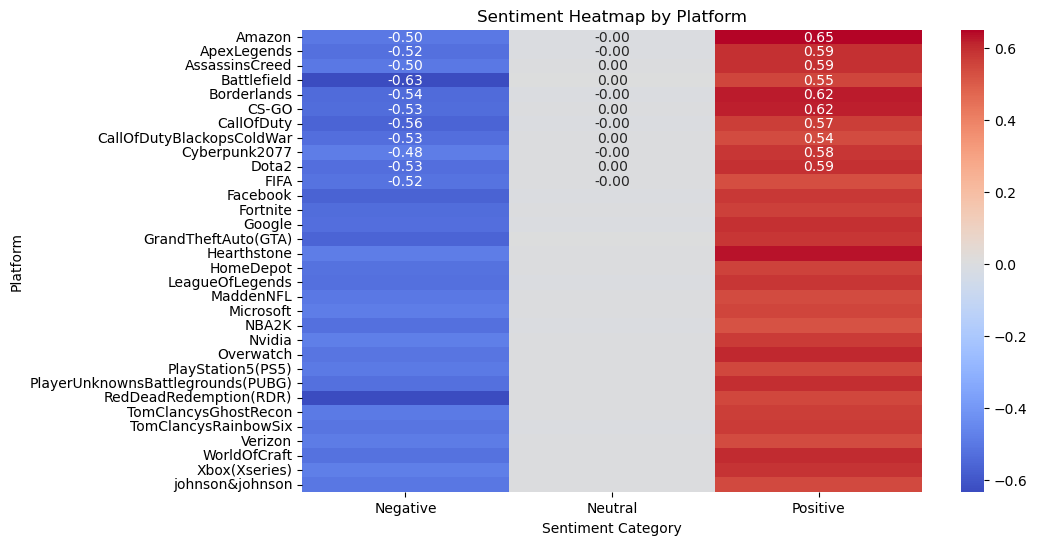

In [37]:
import seaborn as sns

# Create a pivot table of sentiment scores by platform and sentiment category
pivot_table = twitter_df.pivot_table(index='Platform1', columns='Sentiment_Category', values='Sentiment_Score1', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Sentiment Heatmap by Platform')
plt.xlabel('Sentiment Category')
plt.ylabel('Platform')
plt.show()

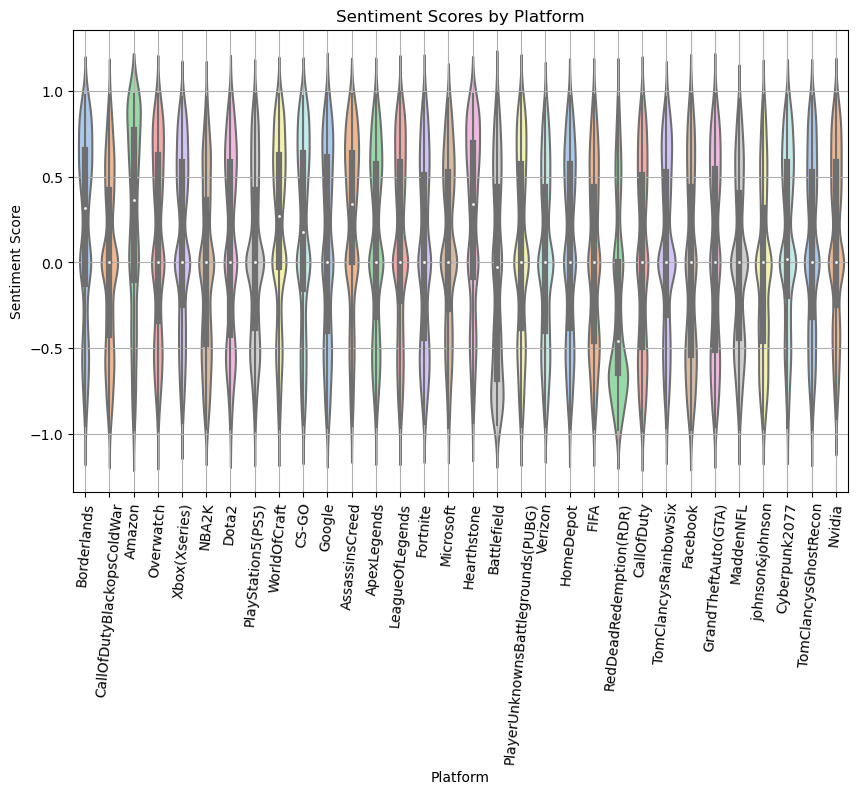

In [38]:
import seaborn as sns

# Violin plot of sentiment scores by platform
plt.figure(figsize=(10, 6))
sns.violinplot(x='Platform1', y='Sentiment_Score1', data=twitter_df, palette='pastel')
plt.title('Sentiment Scores by Platform')
plt.xlabel('Platform')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=85)
plt.grid(True)
plt.show()

In [39]:
%matplotlib inline

In [40]:
# Calculate text length for each row in the 'Text1' column
twitter_df['Text_Length'] = twitter_df['Text1'].apply(len)

In [41]:
print(twitter_df.columns)

Index(['Platform1', 'Sentiment1', 'Text1', 'Cleaned_Text1', 'Tokens1',
       'Sentiment_Score1', 'Sentiment_Category', 'Text_Length'],
      dtype='object')


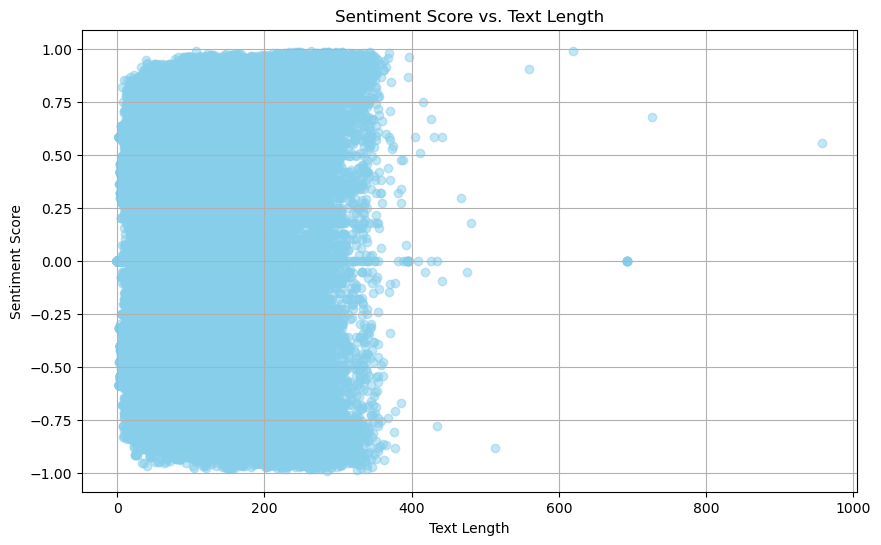

In [42]:
# Scatter plot of sentiment score vs. text length
plt.figure(figsize=(10, 6))
plt.scatter(twitter_df['Text_Length'], twitter_df['Sentiment_Score1'], color='skyblue', alpha=0.5)
plt.title('Sentiment Score vs. Text Length')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

In [43]:
print(twitter_df.head())

     Platform1 Sentiment1                                              Text1  \
0  Borderlands   Positive  I am coming to the borders and I will kill you...   
1  Borderlands   Positive  im getting on borderlands and i will kill you ...   
2  Borderlands   Positive  im coming on borderlands and i will murder you...   
3  Borderlands   Positive  im getting on borderlands 2 and i will murder ...   
4  Borderlands   Positive  im getting into borderlands and i can murder y...   

                                       Cleaned_Text1  \
0  i am coming to the borders and i will kill you...   
1  im getting on borderlands and i will kill you all   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands  and i will murder y...   
4  im getting into borderlands and i can murder y...   

                              Tokens1  Sentiment_Score1 Sentiment_Category  \
0             [coming, borders, kill]           -0.6908           Negative   
1    [im, getting, borderl

In [44]:
# Assuming twitter_df['Sentiment_Score1'] contains sentiment scores
sentiment_scores = twitter_df['Sentiment_Score1']

In [45]:
# Create dates based on the index
dates = pd.date_range(start='2024-01-01', periods=len(sentiment_scores), freq='D')

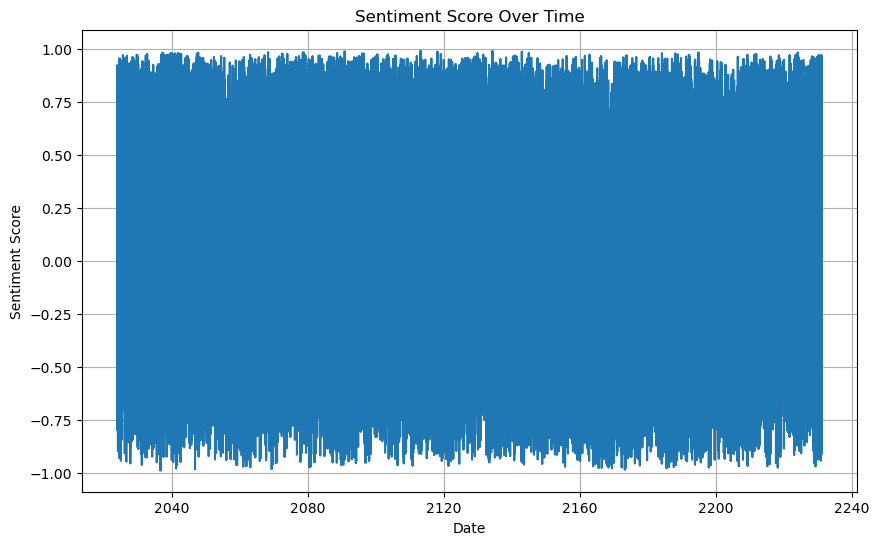

In [46]:
# Plot sentiment scores over time
plt.figure(figsize=(10, 6))
plt.plot(dates, sentiment_scores)
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Over Time')
plt.grid(True)
plt.show()

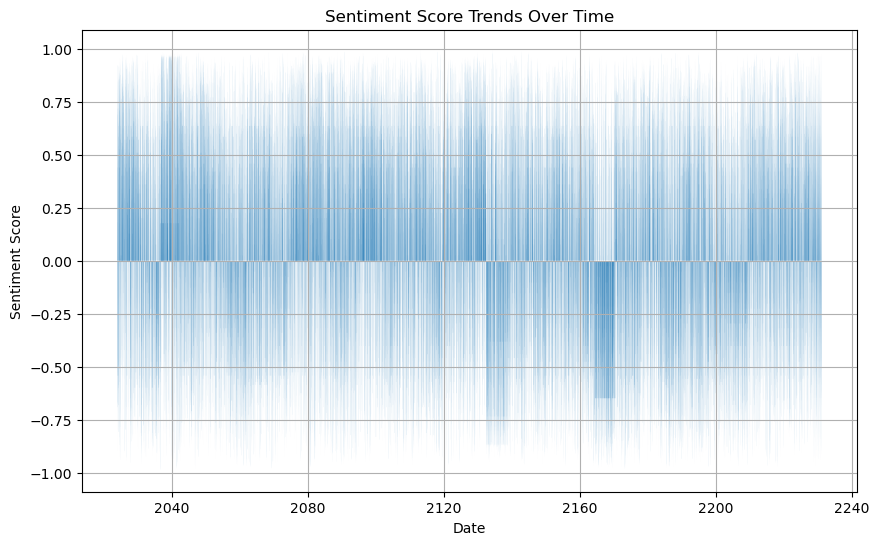

In [47]:
#Area Plot (Sentiment Score Trends Over Time)
plt.figure(figsize=(10, 6))
plt.fill_between(dates, sentiment_scores)
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Trends Over Time')
plt.grid(True)
plt.show()

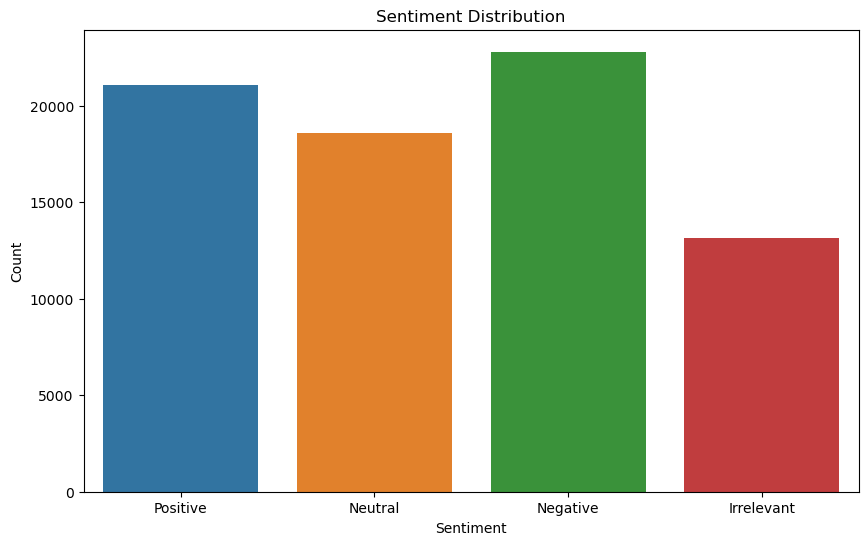

In [48]:
# Create the countplot graph
plt.figure(figsize=(10, 6))
sns.countplot(data=twitter_df, x='Sentiment1')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()